# Making predictions on the Iris Dataset

This is dead simple and watered down `Machine Learning model selection and evaluation` project using `Python` for making predictions on the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris) inspired by a tutorial by Dr. Jason Brownlee. <br>

## 0. Check the versions of all the libraries

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.5.0 (v3.5.0:374f501f4567, Sep 12 2015, 11:00:19) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
scipy: 0.18.1
numpy: 1.12.0
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1


## 1. Load libraries

In [2]:
# For inline plotting
%matplotlib inline

import pandas
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



## 2. Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pandas.read_csv(url, names=names)

## 3. Summarize the Dataset

Time to take a look at the data:

* Dimensions of the dataset.
* Peek at the data itself.
* Statistical summary of all attributes.
* Breakdown of the data by the class variable.

### 3.1 Dimensions of Dataset

In [4]:
# Shape

print(dataset.shape)

(150, 5)


### 3.2 Peek at the Data

In [5]:
# Head

print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

### 3.3 Statistical Summary

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 3.4 Class Distribution

In [7]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 4. Data Visualization

We are going to look at two types of plots:

* Univariate plots to understand each attribute.
* Multivariate plots to understand the relationships between attributes.

### 4.1 Univariate Plots

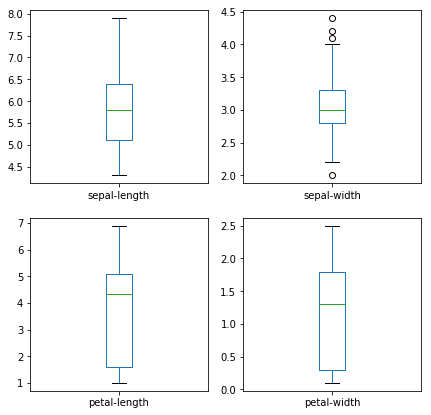

In [8]:
# Box plots

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(7,7))
plt.show()

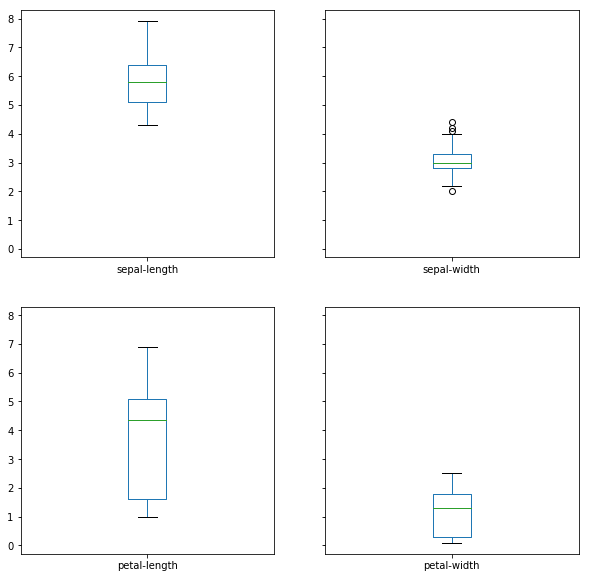

In [9]:
# Same as the above, but with `sharex` and `sharey` set to True. 
# Helps me understand the relative size of the attributes 

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=True, sharey=True, figsize=(10,10))
plt.show()

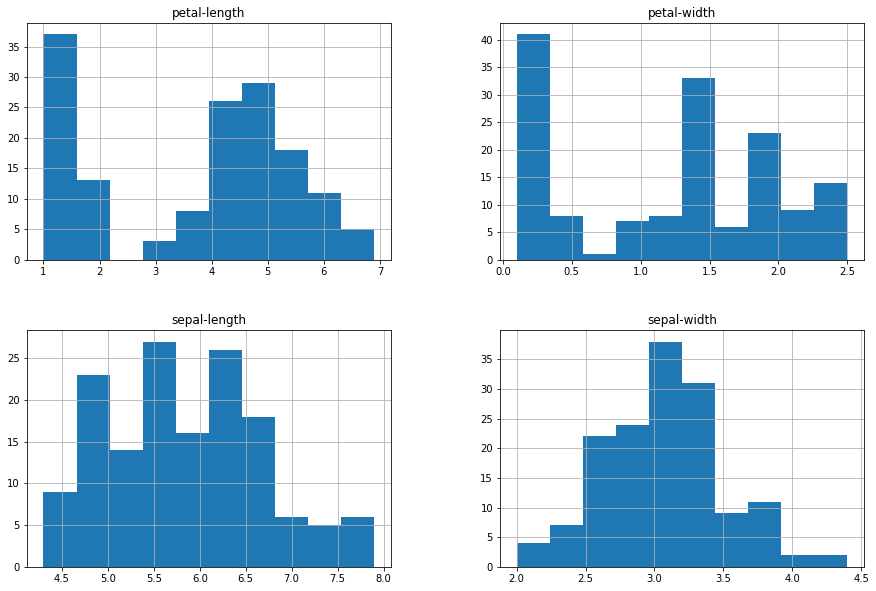

In [10]:
# Histograms

dataset.hist(figsize=(15,10))
plt.show()

Two of the above histograms have a Gaussian like distribution.

### 4.2 Multivariate Plots

Diagonal grouping of some attribute-pairs indicate high correlation and predictable relationship.

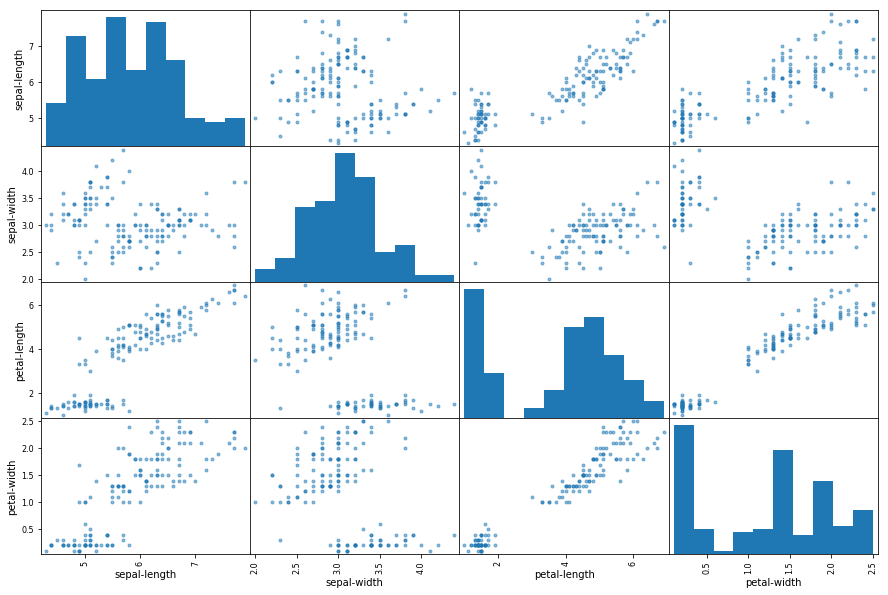

In [11]:
# Scatter plot matrix

scatter_matrix(dataset, figsize=(15,10))
plt.show()

## 5. Evaluate Some Algorithms

Let's create some models of the data and estimate their accuracy on unseen data.

We will:

* Separate out a validation dataset (create training and validation datasets)
* Set-up the test to use 10-fold cross validation.
* Build 5 different models to predict species from flower measurements
* Select the best model.

### 5.1 Create a Validation Dataset

In [12]:
# Split out validation dataset

array = dataset.values

Select all rows and the first 4 attributes: sepal-length,  sepal-width,  petal-length,  petal-width

In [13]:
X = array[:,0:4]

Select all rows and the 5th attribute. Content: Iris-setosa, Iris-versicolor, Iris-virginica

In [14]:
Y = array[:,4]

80% of the dataset to train the models and 20% of the dataset to validate.

In [15]:
validation_size = 0.20

Load the training data into `X_train` and `Y_train` for preparing models, and <br>
into `X_validation` and `Y_validation` sets for testing or validating our model.

In [16]:
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, 
                                                                                Y, 
                                                                                test_size=validation_size, 
                                                                                random_state=seed)

### 5.2 Test Harness

Split the dataset into 10 parts: train on 9 and test on 1. <br>
Then, repeat for all combinations of train-test splits.

`accuracy` => metric for model evaluation

\begin{equation*}
accuracy = \frac{No. of correctly predicted instances}{Total No. of instances in the dataset} * 100
\end{equation*}

In [17]:
seed = 7
scoring = 'accuracy'

### 5.3 Build Models

We will evaluate 6 different algorithms:

Linear:
* Logistic Regression (LR) | `'sklearn.linear_model.logistic.LogisticRegression'`
* Linear Discriminant Analysis (LDA) | `'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'`

Non Linear:
* K-Nearest Neighbors (KNN) | `'sklearn.neighbors.classification.KNeighborsClassifier'`
* Classification and Regression Trees (CART) | `'sklearn.tree.tree.DecisionTreeClassifier'`
* Gaussian Naive Bayes (NB) | `'sklearn.naive_bayes.GaussianNB'`
* Support Vector Machines (SVM) | `'sklearn.svm.classes.SVC'`

Reset the random number `seed` before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


Evaluate each model in turn

In [25]:
results = []
names = []

for name, model in models:
    #
    kfold = model_selection.KFold(n_splits=10, 
                                  random_state=seed)
    #
    cv_results = model_selection.cross_val_score(model, 
                                                 X_train, Y_train, 
                                                 cv=kfold, scoring=scoring)
    #
    results.append(cv_results)
    names.append(name)
    msg = "{0}: {1:f} ({2:f})".format(name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


### 5.3 Select the Best Model

Create a plot of the model evaluation results and compare <br>
the spread and the mean accuracy of each model. There is a population <br>
of accuracy measures for each algorithm because each algorithm was <br>
evaluated 10 times (10 fold cross validation).

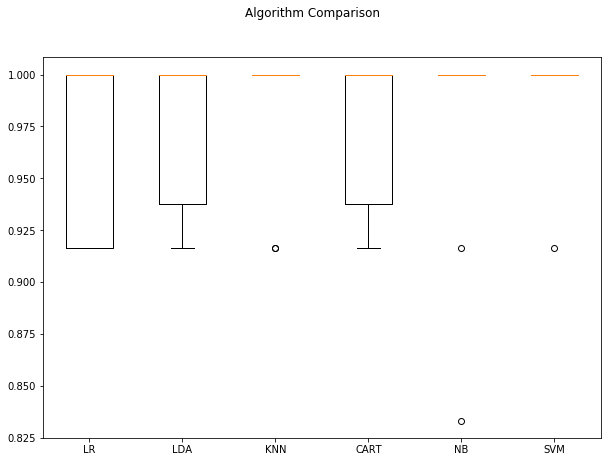

In [31]:
fig = plt.figure(figsize=(10,7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6. Make Predictions

We will use the KNN and the SVC models to make predictions <br> 
on the validation dataset for a final accuracy evaluation.

### KNN

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("Accuracy score:")
print(accuracy_score(Y_validation, predictions))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()

print("classification_report:")
print(classification_report(Y_validation, predictions))
print()

Accuracy score:
0.9

confusion_matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30




### SVM

In [37]:
# SVM
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print("Accuracy score:")
print(accuracy_score(Y_validation, predictions))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()

print("classification_report:")
print(classification_report(Y_validation, predictions))
print()

Accuracy score:
0.933333333333

confusion_matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30




## Conclusion:

`Support Vector Machines (SVM)` with an accuracy of 93% comes out as a better contender <br>
for this analysis. Though, in the tutorial where I picked this analysis from, KNN proved to be better. <br>
Not sure, how that is. I am just starting out :)

#### Credit:

Source: [Machine learning in-Python step-by-step](http://machinelearningmastery.com/machine-learning-in-python-step-by-step/) by Dr. Jason Brownlee